# BEST CITY TO ALLOCATE A GAMING COMPANY

## Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from pymongo import MongoClient
import math
import matplotlib.pyplot as plt

## MongoDB

In [2]:
#Importing companies.json from mongodb.
client = MongoClient("mongodb://localhost/companies")
db = client.get_database()

In [29]:
#Importing information about companies from MongoDB.
query={"$and":[{"category_code":{"$eq":"games_video"}},{"number_of_employees":{"$gte":10}}]}
list_companies=list(db['companies'].find((query),{"category_code":1,'number_of_employees':1,'name':1,"total_money_raised":1,"offices":1,'_id':0}).sort("number_of_employees",-1))

In [30]:
#Converting the info into 'pandas'
df = pd.DataFrame(list_companies)

In [31]:
#Removing duplicates.
df = df.drop_duplicates(subset='name', keep='first')

In [32]:
#Removing the lists from column 
df = df.explode('offices')

In [33]:
exapand_office_column = df[["offices"]].apply(lambda r: r.offices, result_type="expand", axis=1)

In [34]:
data_expanded = pd.concat([df,exapand_office_column], axis=1)

In [35]:
#Removing old column with lists.
df_companies = data_expanded.drop(columns=["offices"])

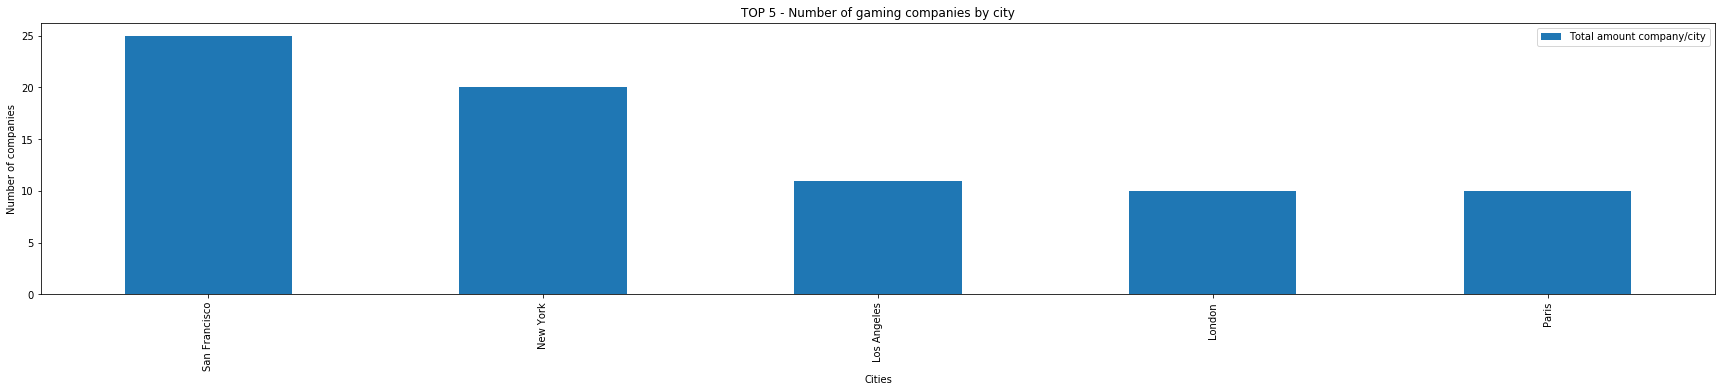

In [36]:
#TOP5 cities where there are more companies with 'category code' = 'video_games'

graph_df=df_companies[['city','name']]
graphic= graph_df.groupby('city').count().sort_values('name',ascending = False).head()

graphic.plot.bar(figsize=(30,5));
plt.legend(["Total amount company/city"])
plt.title("TOP 5 - Number of gaming companies by city")
plt.xlabel("Cities")
plt.ylabel("Number of companies");

# API from geocode

it will be used the API from geocode in order to extract the coordenates for the TOP5 cities mentioned above.

In [37]:
#COORDENATES FOR SAN FRANCISCO

def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

sf = geocode("San Francisco")
sf

{'type': 'Point', 'coordinates': [-15.41914, 27.99493]}

In [38]:
#COORDENATES FOR NEW YORK

def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

ny = geocode("New York")
ny

{'type': 'Point', 'coordinates': [-73.9586, 40.68908]}

In [39]:
#COORDENATES FOR LOS ANGELES

def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

la = geocode("Los Angeles")
la

{'type': 'Point', 'coordinates': [-118.29757, 34.04015]}

In [40]:
#COORDENATES FOR PARIS

def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

paris = geocode("Paris")
paris

{'type': 'Point', 'coordinates': [2.34293, 48.85717]}

In [41]:
#COORDENATES FOR LONDON

def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }

london = geocode("London")
london

{'type': 'Point', 'coordinates': [-0.11362, 51.51768]}